# run staNMF

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from staNMF import staNMF
from staNMF.nmf_models import sklearn_nmf

In [3]:
#load_data
tmp = np.load('../data/imputed_data_kNN_neighbor_6_weights_distance.npz')
data = tmp['imputed']
selected = tmp['selected']
original_shape = data.shape

In [11]:
#load reference atlas
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')

In [26]:
# preprocess compute the support
support = np.sum(areas_atlas, 0) > 0

Text(1,3,'support')

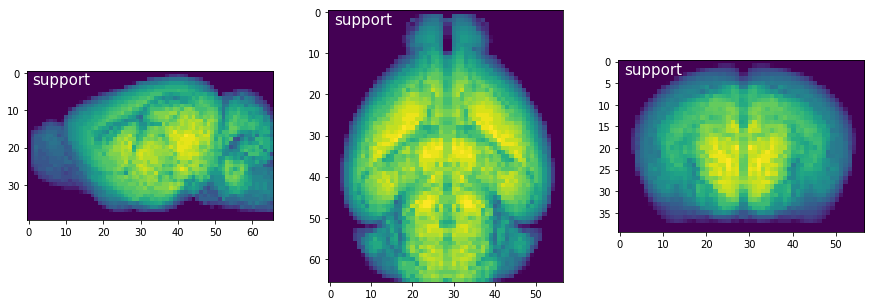

In [27]:
#visualize the support
_, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
a.imshow(np.mean(support[:, :, :], 2).T)
b.imshow(np.mean(support[:, :, :], 1))
c.imshow(np.mean(support[:, :, :], 0))
a.text(1, 3, 'support', color='w', fontsize=15)
b.text(1, 3, 'support', color='w', fontsize=15)
c.text(1, 3, 'support', color='w', fontsize=15)

In [37]:
np.sum(data[:,:-1,:-1,:-1][:, support] < -0.5) / np.sum(data[:,:-1,:-1,:-1][:, support] > -0.5)

0.012409315718148012

In [30]:
# preprocess : get the data within the reference atlas
filtered_data = data[:,:-1,:-1,:-1][:, support]
filtered_data.shape

(4345, 55954)

In [62]:
stanmf = staNMF(K1=8,
                K2=25,
                X=np.maximum(filtered_data,0),
                folderID='Mar17',
                chunksize=2,
                parallel=True,
                processes=30,
                replicates=100,
                seed=1234)

In [63]:
stanmf.runNMF(sklearn_nmf(bootstrap=True, init="nndsvd", solver='mu', max_iter=1000))

Working on K = 8...
Working on K = 9...
Working on K = 10...
Working on K = 11...
Working on K = 12...
Working on K = 13...
Working on K = 14...
Working on K = 15...
Working on K = 16...
Working on K = 17...
Working on K = 18...
Working on K = 19...
Working on K = 20...
Working on K = 21...
Working on K = 22...
Working on K = 23...
Working on K = 24...
Working on K = 25...


In [64]:
stanmf.instability('sklearn_nmf')

Calculating instability for 8
Calculating instability for 9
Calculating instability for 10
Calculating instability for 11
Calculating instability for 12
Calculating instability for 13
Calculating instability for 14
Calculating instability for 15
Calculating instability for 16
Calculating instability for 17
Calculating instability for 18
Calculating instability for 19
Calculating instability for 20
Calculating instability for 21
Calculating instability for 22
Calculating instability for 23
Calculating instability for 24
Calculating instability for 25


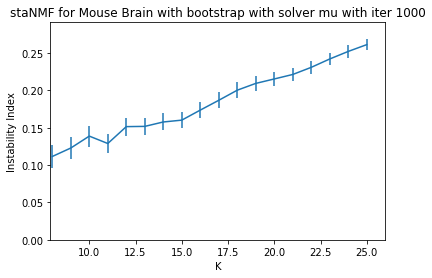

In [65]:
stanmf.plot(dataset_title="staNMF for Mouse Brain with bootstrap with solver mu with iter 1000")